-----------------------------------------------------------------Perpunimi-Dixhital-i-Imazhit-----------------------------------------------------------------
<p>
    <a href="https://umt.edu.al/en/anxhelo-shehu/" target="_blank">
    <img src="https://umt.edu.al/wp-content/uploads/2022/10/Anxhelo-Shehu-min-2-300x300.jpg" width="150" alt="UMT Logo">
    </a>
</p>

<p>
    <a href="https://umt.edu.al/" target="_blank">
    <img src="https://umt.edu.al/wp-content/uploads/2024/11/Universiteti-Metropolitan-Tirana.webp" width="200" alt="UMT Logo">
    </a>
</p>


<h1> Operacionet Gjeometrike dhe Mjetet e Tjera Matematike me OpenCV (Filtrat Hapsinor)</h1>


Koha e nevojshme per kete Lab: **+40** minuta

<h2> Operacione Hapsinore ne Perpunimin e Imazhit </h2>


Operacionet hapësinore përdorin pikselët në një zone për të përcaktuar vlerën e pikselit aktual. Aplikimet përfshijnë filtrimin dhe mprehjen e imazheve. Ato përdoren në shumë hapa të vizionit kompjuterik, si segmentimi, dhe janë një komponent thelbësor në algoritmet e Inteligjencës Artificiale.


- Filtrimi Linear
    - Filtrimi i Zhurmës
    - Zbutja Gaussiane (Gaussian Blur)
    - Mprehja e Imazhit
- Skajet (Edges)
- Filtri Median
- Pragu (Threshold)



Shkarkojme imazhet e nevojshme per kete laborator

In [1]:
import requests

# URLs per imazhet
urls = [
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg"
]

# Shkarkojme edhe ruajm imazhet duke perdorur URL perkatese
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        filename = url.split("/")[-1]
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded: {filename}")
    else:
        print(f"Failed to download: {url}")

Downloaded: lenna.png
Downloaded: barbara.png
Downloaded: cameraman.jpeg


Ne do të importojmë bibliotekat e mëposhtme:

In [2]:
# Përdoret për të shfaqur imazhet
import matplotlib.pyplot as plt
# Përdoret për të kryer filtrimin në një imazh
import cv2
# Përdoret për të krijuar bërthama (kernela) për filtrimin
import numpy as np

Funksioni i meposhtem ploton dy imazhe ngjitur per krahasim

In [3]:
def plot_image(image_1, image_2,title_1="Origjinali",title_2="Imazhi i "):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

Operacionet hapësinore përdorin pikselët e nanoringut (pikselat qe formojne fqinjesi-rrethues) për të përcaktuar vlerën e pikselit aktual.

## Filtrimi Linear


Filtrimi përfshin përmirësimin e një imazhi, për shembull, heqjen e zhurmës nga një imazh. Zhurma shkaktohet nga një kamerë e keqe ose kompresim i keq i imazhit. Të njëjtat faktorë që shkaktojnë zhurmë mund të çojnë gjithashtu në imazhe të mjegullta, ndaj mund të aplikojmë filtra për të mprehur këto imazhe. Konvolucioni është një mënyrë standarde për të filtruar një imazh, dhe filtri quhet bërthama (kernel), ndërsa bërthama të ndryshme kryejnë detyra të ndryshme. Për më tepër, konvolucioni përdoret në shumë nga algoritmet më të avancuara të inteligjencës artificiale. Ne thjesht marrim produktin e pikës (dot product) të bërthamës dhe një pjesë të imazhit me madhësi të barabartë. Më pas, e lëvizim bërthamën dhe e përsërisim procesin.

Marin ne shqyrtim imazhin e meposhtem

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


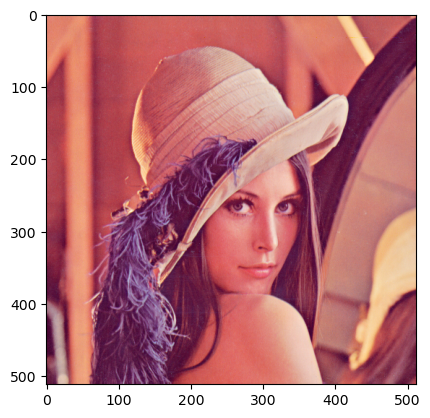

In [83]:
# Ngarkon imazhin nga skedari i specifikuar
imazh = cv2.imread ("lenna.png")
print (imazh)
# Konverton rendin e ngjyrës nga BGR (Blue Green Red) në RGB (Red Green Blue) më pas e jep imazhin nga grupi i të dhënave
plt.imshow(cv2.cvtColor(imazh, cv2.COLOR_BGR2RGB))

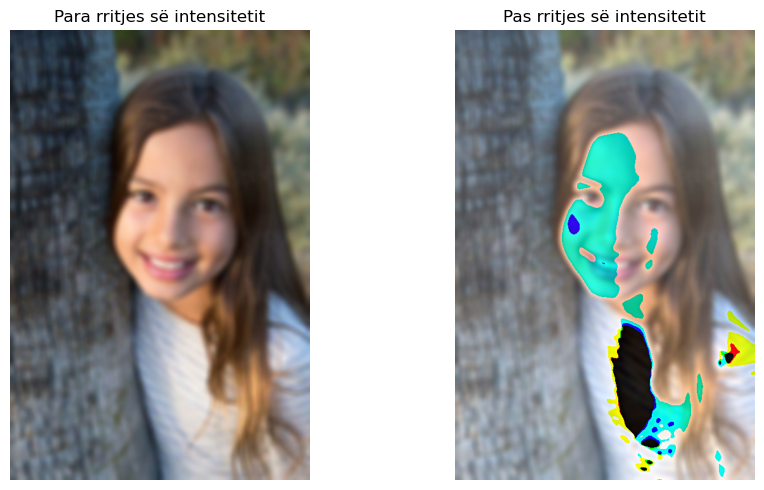

In [85]:
# Leximi i imazhit
imazh = imazhi_filtruar

# Kontroll nëse imazhi u lexua me sukses
if imazh is None:
    print("Imazhi nuk u gjet.")
else:
    # Konvertimi nga BGR në RGB për shfaqje me matplotlib
    imazh_rgb = cv2.cvtColor(imazh, cv2.COLOR_BGR2RGB)

    # Rritja e intensitetit të ngjyrave
    increase_value = 50
    imazh_bright = np.clip(imazh + increase_value, 0, 255).astype(np.uint8)
    imazh_bright_rgb = cv2.cvtColor(imazh_bright, cv2.COLOR_BGR2RGB)

    # Shfaqja e imazheve para dhe pas
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(imazh_rgb)
    plt.title("Para rritjes së intensitetit")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imazh_bright_rgb)
    plt.title("Pas rritjes së intensitetit")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Imazhet me të cilat punojmë janë të përbëra nga vlera RGB, të cilat janë vlera nga 0 në 255. Zero do të thotë zhurmë e bardhë, e cila bën që imazhi të duket me grano (me pikla).

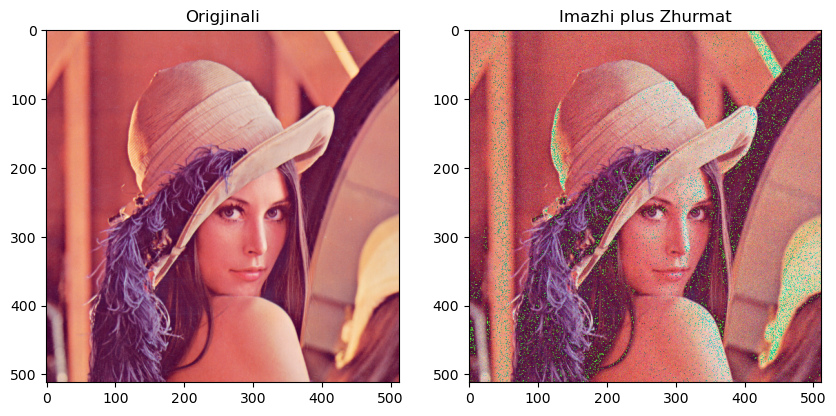

In [5]:

# Merrni numrin e rreshtave dhe kolonave në imazh
rreshta, kolona,_= imazh.shape
# Krijon vlera duke përdorur një shpërndarje normale me një mesatare prej 0 dhe devijim standard prej 15, vlerat konvertohen në njësi8 që do të thotë se vlerat janë midis 0 dhe 255
zhurmë = np.random.normal(0,15,(rreshta, kolona,3)).astype(np.uint8)
# Shtoni zhurmën në imazh
imazhi_zhurmë = imazh + zhurmë
# Paraqit imazhin origjinal dhe imazhin me zhurmë duke përdorur funksionin e përcaktuar në krye
plot_image(imazh, imazhi_zhurmë, title_1="Origjinali",title_2="Imazhi plus Zhurmat")

Kur shtohet zhurma në një imazh, ndonjëherë vlera mund të jetë më e madhe se 255.
Në këtë rast, 256 hiqet nga vlera për të mbajtur numrin brenda intervalit nga 0 deri në 255.

Për shembull, supozoni një imazh me një vlerë RGB prej 137 dhe shtohet zhurmë me një vlerë RGB prej 215, kështu që kemi një vlerë RGB prej 352.

Pastaj, ne heqim 256, numrin e mundshëm të vlerave mes 0 dhe 255, për të marrë një numër brenda intervalit nga 0 deri në 255.

### Zhurma e filtrimit

Filtrat e zbutjes bëjnë mesataren e pikseleve brenda një lagjeje, dhe ndonjëherë quhen filtra me kalim të ulët (low pass filters). Për filtrimin me mesatare (mean filtering), bërthama (kernel) thjesht bën mesataren e vlerave të pikseve brenda lagjes.

In [6]:
# Krijoni një kernel i cili është një matric 6 me 6 ku secila vlerë është 1/36
kernel = np.ones((6,6))/36

Funksioni <code>filter2D</code> kryen konvolucion 2D midis imazhit <code>src</code> dhe bërthames <code>kernel</code> në çdo kanal ngjyre në mënyrë të pavarur. Parametri <a href="https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths">ddepth</a> ka të bëjë me madhësinë e imazhit të daljes, dhe ne do ta vendosim në -1 që inputi dhe outputi të kenë të njëjtën madhësi.

In [72]:
# Filtro imazhet duke përdorur kernelin
imazhi_filtruar = cv2.filter2D(src = imazhi_zhurmë, ddepth=-1, kernel=kernel)

Ne mund të shfaqim imazhin para dhe pas filtrimit; do të shohim që zhurma është reduktuar, por imazhi është bërë i mjegullt.


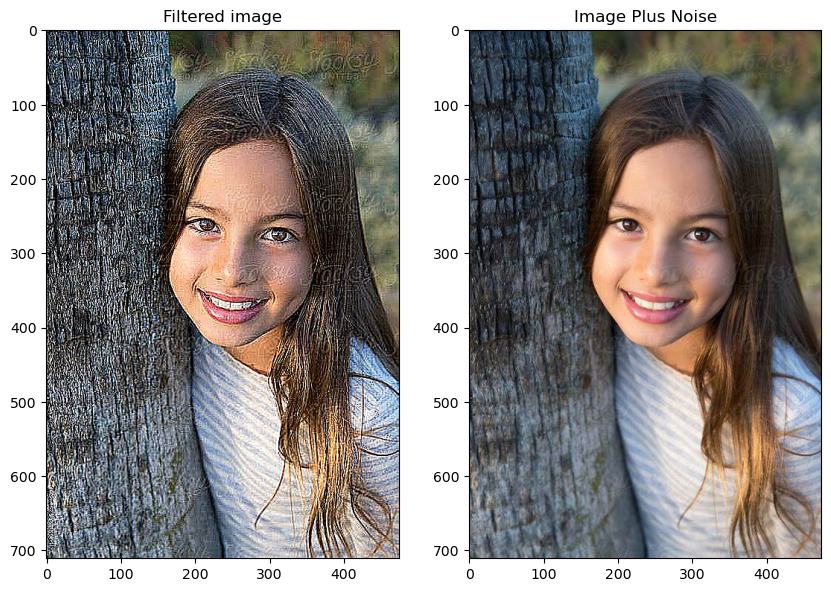

In [73]:
# Paraqesim imazhin e filtruar dhe me zhurmë duke përdorur funksionin e përcaktuar më heret
plot_image(imazhi_filtruar, imazhi_zhurmë,title_1="Filtered image",title_2="Image Plus Noise")

Një filter (kerner) më i vogël e mban imazhin të mprehur, por filtrohen më pak zhurmat. Këtu provojmë një filter 4x4.

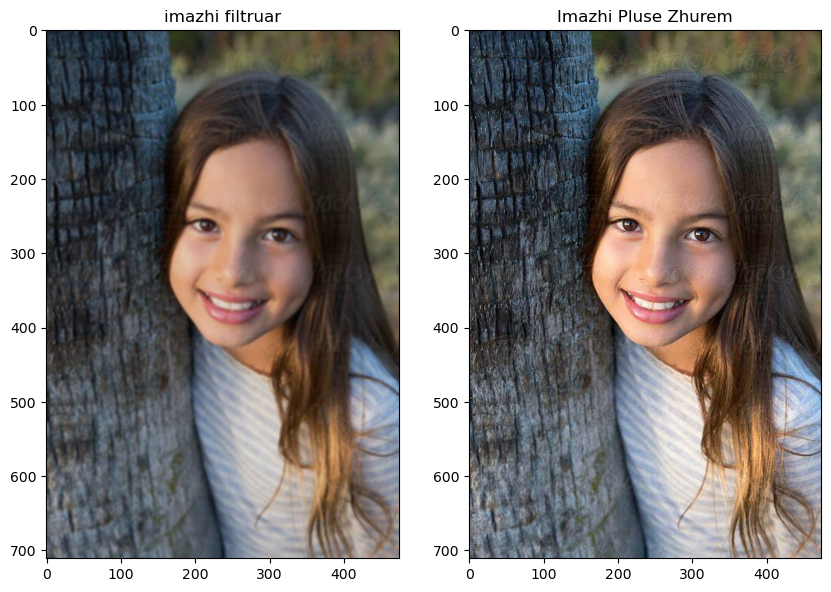

In [75]:
# Krijon një filter i cili është një matric 4 me 4 ku secila vlerë është 1/16
kernel = np.ones((4,4))/16
# Filtrojme imazhin duke perdorur filtrin
imazhi_filtruar=cv2.filter2D(src=imazhi_zhurmë, ddepth=-1,kernel=kernel)
# Paraqesim Imazhin e filtruar dhe imazhin me zhurmë duke përdorur funksionin e përcaktuar më heret
plot_image(imazhi_filtruar, imazhi_zhurmë,title_1="imazhi filtruar",title_2="Imazhi Pluse Zhurem")

### Zbutja Gaussiane (Gaussian Blur)


Funksioni <code>GaussianBlur</code> kryen konvolucionin e imazhit burimor me bërthamën (Filtrin) Gaussian të specifikuar. Ai filtro zhurmën, por bën një punë më të mirë në ruajtjen e skajeve. Ai ka parametrat e mëposhtëm:

Parametrat

<p><code>src</code> imazhi hyrës; imazhi mund të ketë çdo numër kanalesh, të cilat përpunohen në mënyrë të pavarur.</p> <p><code>ksize</code>: Madhësia e bërthamës Gaussian</p> <p><code>sigmaX</code>: Devijimi standard i bërthamës Gaussian në drejtimin X</p> <p><code>sigmaY</code>: Devijimi standard i bërthamës Gaussian në drejtimin Y; nëse sigmaY është zero, ai vendoset të jetë i barabartë me sigmaX</p>


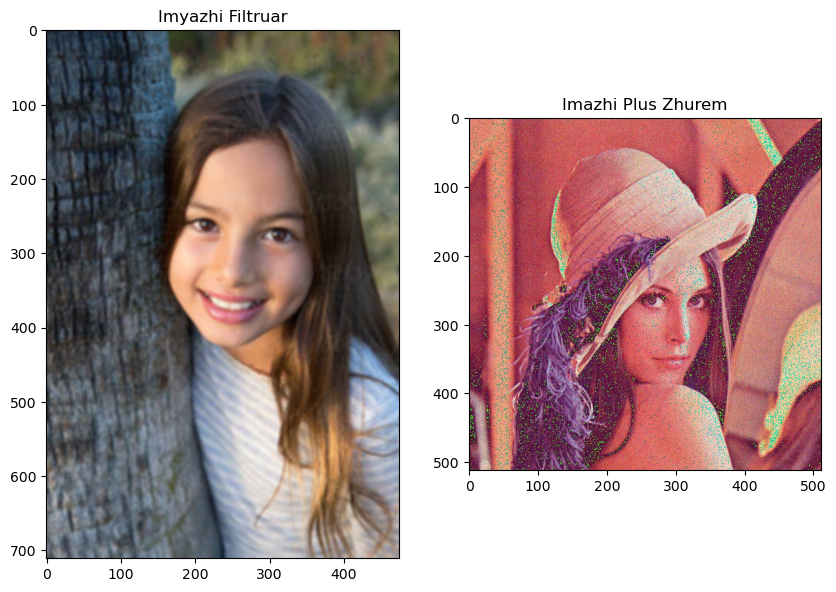

In [78]:
# Filtrojme imazhin duke përdorur GaussianBlur mbi imazhin me zhurmë duke përdorur një bërthamë 4x4 
imazhi_filtruar = cv2.GaussianBlur(imazhi_zhurmë,(5,5),sigmaX=18,sigmaY=14)

# Shfaqim imazhin e filtruar, pastaj imazhin pa filtruar me zhurmë
plot_image(imazhi_filtruar , imazhi_zhurmë, title_1="Imyazhi Filtruar",title_2="Imazhi Plus Zhurem")

Sigma sillet si madhësia e filtrit të mesatares, një vlerë më e madhe e sigma do të bëjë imazhin më të mjegullt, por gjithsesi jeni të kufizuar nga madhësia e filtrit. Këtu e vendosim sigma në 10.

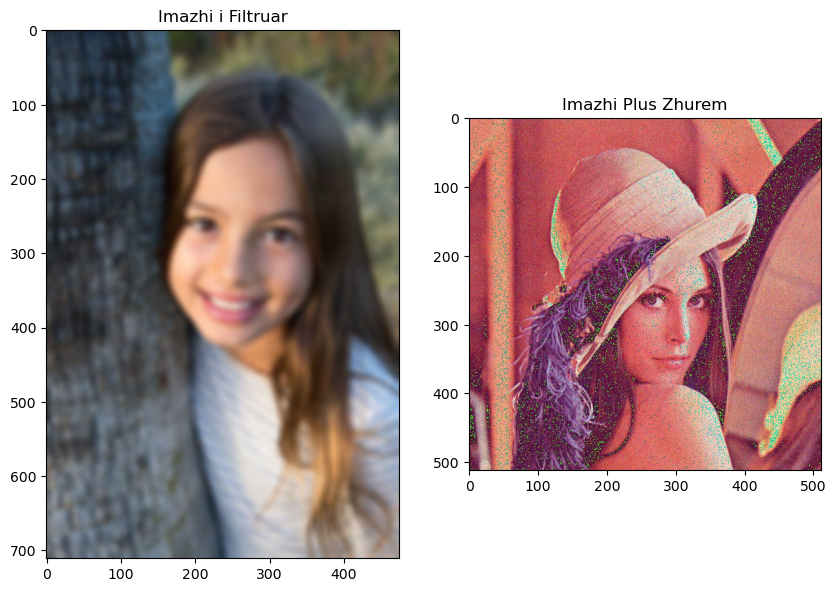

In [79]:
# Filtron imazhin duke përdorur GaussianBlur mbi imazhin me zhurmë duke përdorur një bërthamë 11x11 
imazhi_filtruar = cv2.GaussianBlur(imazhi_zhurmë, (11,11), sigmaX=10,sigmaY=10)

# Plotimi
plot_image(imazhi_filtruar, imazhi_zhurmë, title_1="Imazhi i Filtruar",title_2="Imazhi Plus Zhurem")

Shikoni çfarë ndodh kur vendosni vlera të ndryshme për sigmaX dhe sigmaY, ose kur përdorni bërthama jo-katrore (jo katrore).

### Mprehja e imazhit


Mprehja e imazhit (`Image Sharpening`) përfshin zbutjen e imazhit dhe llogaritjen e derivatëve. Ne mund ta realizojmë mprehtësimin e imazhit duke aplikuar bërthamën (`kernel`) e mëposhtme.

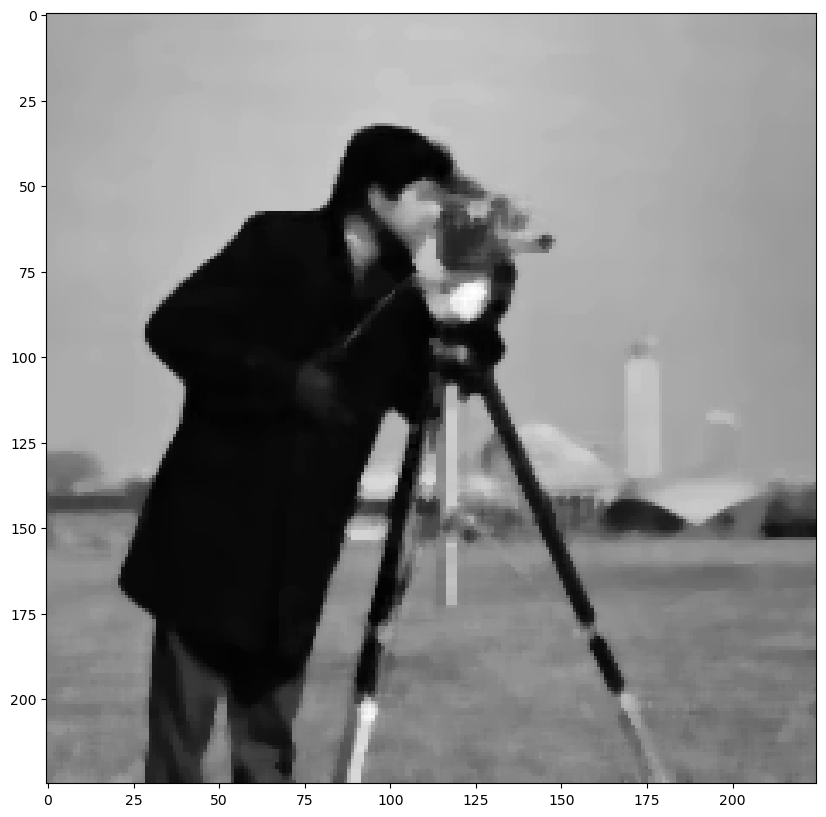

In [81]:
# Filtrojm imazhin duke përdorur Median Blur me një kernel të madhësisë 5
filtered_image = cv2.medianBlur(image, 5)

# shfaqim imazhin e filteruar
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap="gray")

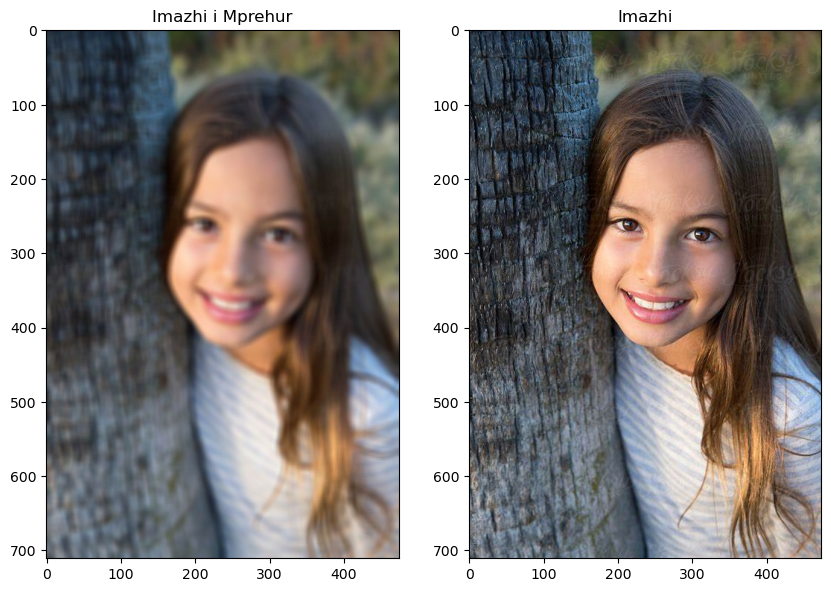

In [82]:
# nje kernel i zakonshem per mprehjen e imazheve
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Aplikimi i filtrit duke përdorur kernel në imazhin origjinal pa zhurmë
sharpened = cv2.filter2D(imazhi_filtruar, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , imazh, title_1="Imazhi i Mprehur",title_2="Imazhi")

## Skajet


Skajet janë zonat ku ndryshojnë intensitetet e pikseleve. Gradienti i një funksioni jep normën e ndryshimit; ne mund të afrojmë gradientin e një imazhi në shkallë gri duke përdorur konvolucionin.

Ekzistojnë disa metoda për të afruar gradientin, le të përdorim detektorin e skajeve Sobel. Kjo metodë kombinon disa konvolucione dhe gjen madhësinë (magnitudën) e rezultatit. Konsideroni imazhin e mëposhtëm:

[[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [86 79 76 ...  0  0  0]
 ...
 [45 48 51 ...  0  0  0]
 [38 43 48 ...  0  0  0]
 [31 32 39 ...  0  0  0]]


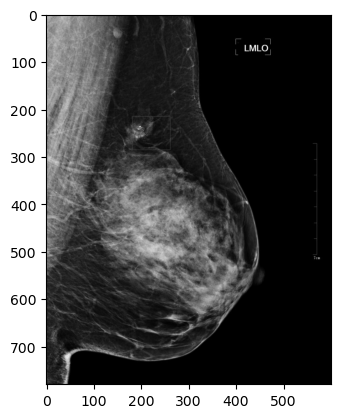

In [52]:
# Ngarkojm imazhet nga filet perkatese
img_gray = cv2.imread('mammogram.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)
# Shfaqim imazhin nga matrica e të dhënave; vini re që është 2-dimensionale dhe jo 3
plt.imshow(img_gray ,cmap='gray')

Ne zbusim imazhin, kjo zvogëlon ndryshimet që mund të shkaktohen nga zhurma dhe që do të ndikonin në gradientin.

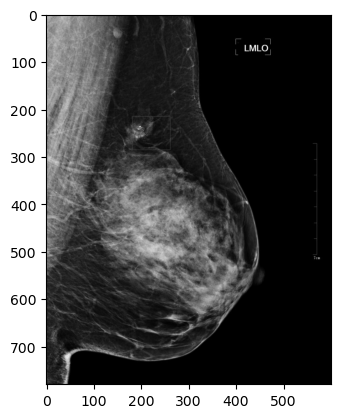

In [53]:
# Filtrojm imazhin duke përdorur GaussianBlur mbi imazhin me zhurmë duke përdorur një bërthamë 3x3

img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# Shfaqim imazhin e filtruar
plt.imshow(img_gray ,cmap='gray')

Ne mund të afrojmë derivatin në drejtimin X ose Y duke përdorur funksionin <code>Sobel</code>. Këtu janë parametrat:

<p><code>src</code>: imazhi hyrës</p> <p><code>ddepth</code>: thellësia e imazhit të daljes, shih kombinimet; në rastin e imazheve hyrëse 8-bit do të rezultojë në deriva të shkurtuara</p> <p><code>dx</code>: rendi i derivatit në drejtimin x</p> <p><code>dy</code>: rendi i derivatit në drejtimin y</p> <p><code>ksize</code>: madhësia e bërthamës së zgjeruar Sobel; duhet të jetë 1, 3, 5, ose 7</p>

dx = 1 përfaqëson derivatin në drejtimin x. Funksioni afron derivatin duke konvoluar imazhin me bërthamën e mëposhtme:






\begin{bmatrix} 
1 & 0 & -1 \\\\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


Ne mund te aplikojme funksionin:

In [92]:
ddepth = cv2.CV_16S
# Aplikojme filtrin ne imazh ne sipas drejtimit x
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

Ne mund te aplikojme rezultatet

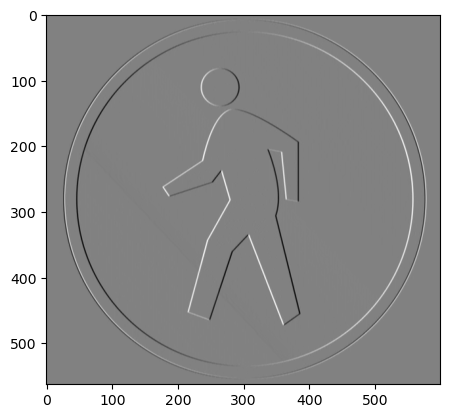

In [93]:
plt.imshow(grad_x,cmap='gray')


dy = 1 përfaqëson derivatin në drejtimin -> Y. Funksioni afron derivatin duke konvoluar imazhin me bërthamën e mëposhtme:



\begin{bmatrix} 
\ \ 1 & \ \ 2 & \ \ 1 \\\\\\
\ \ 0 & \ \ 0 & \ \ 0 \\\\
-1 & -2 & -1 
\end{bmatrix} 

Ne mund te aplikojme funksionin edhe te printojme rezultatet

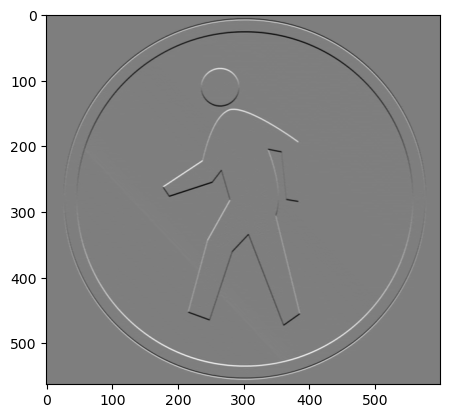

In [94]:
# Aplikimi i filtrit ne imazh ne drejtimin y
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')

In [95]:
grad_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

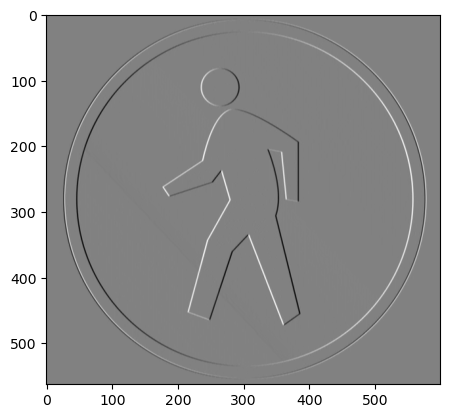

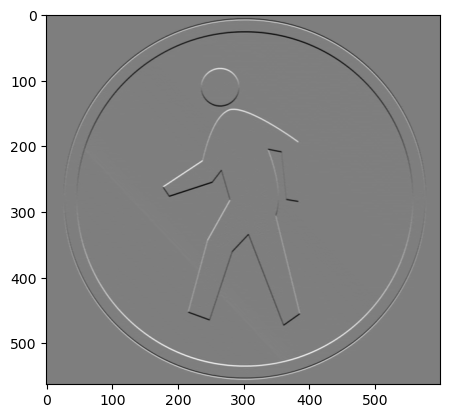

In [96]:
plt.imshow(grad_x, 'gray')
plt.show()
plt.imshow(grad_y, 'gray')
plt.show()

Ne mund të afrojmë gradientin duke llogaritur vlerat absolute dhe duke e konvertuar rezultatin në 8-bit:


In [97]:
# I kthen vlerat përsëri në një numër midis 0 dhe 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
abs_grad_x.shape

(563, 600)

Pastaj aplikoni funksionin <code>addWeighted</code> për të llogaritur shumën e dy matricave-ve siç vijon:

In [98]:
# Shton derivatin në drejtimin X dhe Y
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

Ne pastaj shfaqim rezultatet, dhe shohim imazhin me vija që kanë vlera të larta intensiteti që përfaqësojnë një gradient të madh.









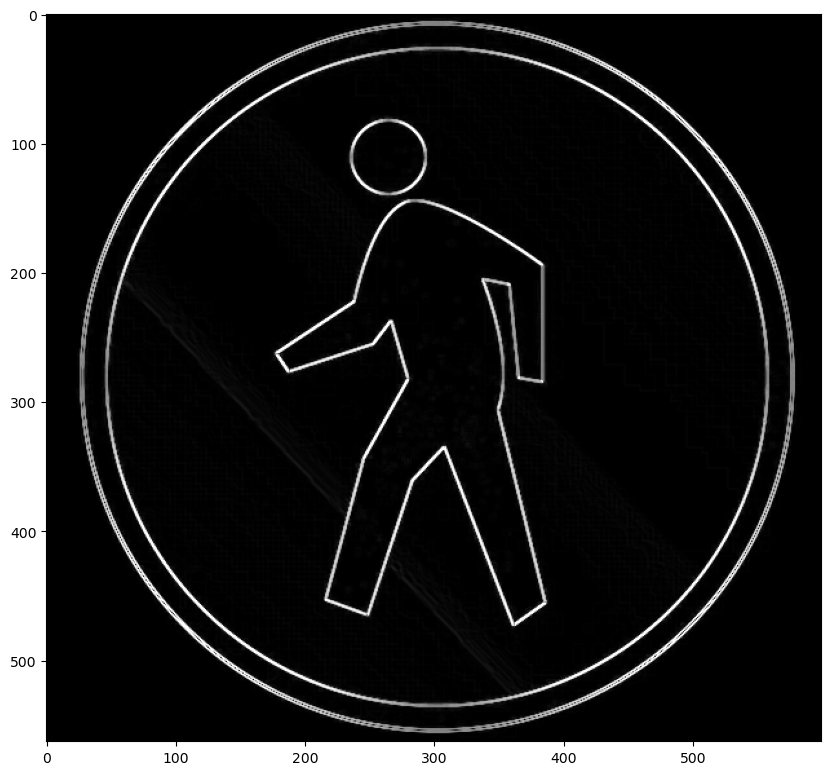

In [99]:
# Bëjm dritaren ku do shfaqim figurën më të madhe dhe shfaqim imazhin
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

## Filtrat Median

Filtrat median gjejnë medianën e të gjitha pikseleve nën zonën e bërthamës dhe elementi qendror zëvendësohet me këtë vlerë mediane.

Ne mund të aplikojmë filtrat median në imazhe të rregullta, por le të shohim si mund të përdorim një filtrat median për të përmirësuar segmentimin. Konsideroni shembullin e kameramanit.

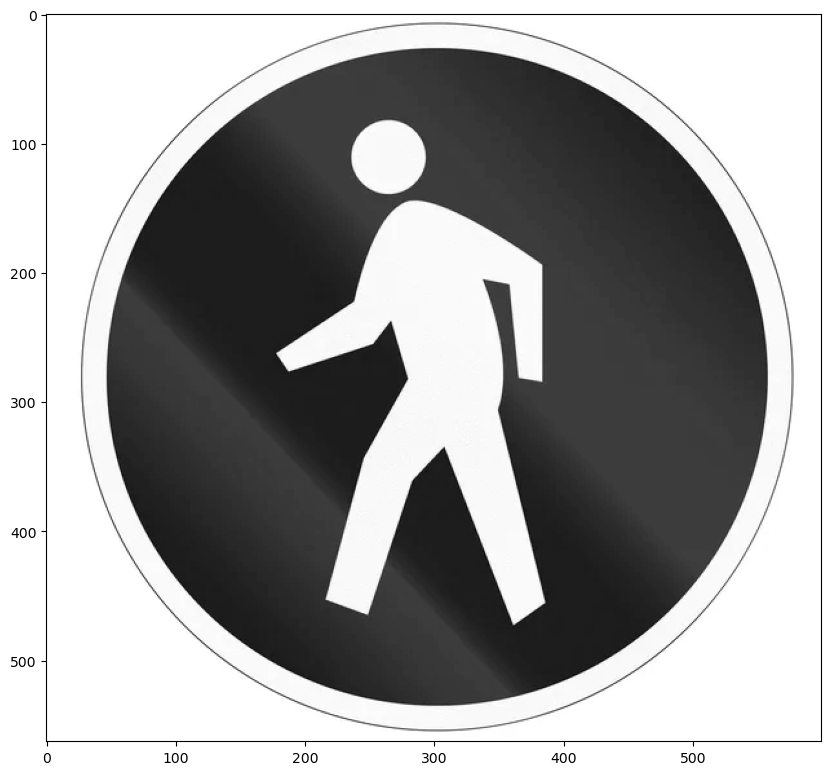

In [86]:
# Ngarkojme Imazhin e kameramanit
image = cv2.imread("mammogram.png",cv2.IMREAD_GRAYSCALE)
# plotojme ne nje dritare te madhe
plt.figure(figsize=(10,10))
# plotojme imazhin
plt.imshow(image,cmap="gray")

Tani le të aplikojmë një Filtrë Median duke përdorur funksionin `medianBlur`. Parametrat për këtë funksion janë `src`: Imazhi dhe `ksize`: Madhësia e filtrit.

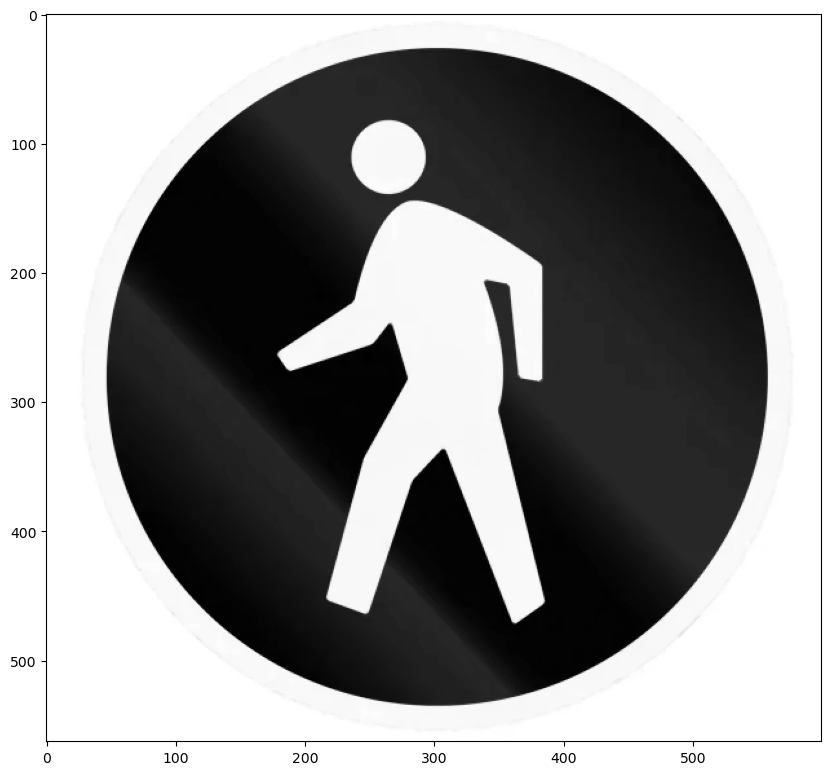

In [87]:
# Filtrojm imazhin duke përdorur Median Blur me një kernel të madhësisë 5
filtered_image = cv2.medianBlur(image, 5)

# shfaqim imazhin e filteruar
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap="gray")

Do të donim të gjenim kameramanin, por filtrimi median kap disa nga background-i.

## Parametrat e Funksionit të Kufirit (Threshold)

`src`: Imazhi që do të përdoret  
`thresh`: Kufiri  
`maxval`: Vlera maksimale për t'u përdorur  
`type`: Lloji i filtrimit  

Funksioni i kufirit punon duke shqyrtuar vlerën e shkallës gri të secilës piksel dhe duke i caktuar një vlerë nëse është nën kufirin dhe një vlerë tjetër nëse është mbi kufirin. Në shembullin tonë, kufiri është 0 (e zezë) dhe lloji është i kundërt binar, kështu që nëse një vlerë është mbi kufirin, vlera e caktuar është 0 (e zezë) dhe nëse është nën ose e barabartë me kufirin, përdoret maxval 255 (e bardhë). Kështu që nëse pikseli është 0 (e zezë), ai caktohet me 255 (e bardhë) dhe nëse pikseli nuk është i zi, ai caktohet me të zezë, që është ajo që THRESH_BINARY_INV i thotë OpenCV të bëjë. Kjo është se si do të funksiononte pa THRESH_OTSU.

Pasi po përdorim THRESH_OTSU, kjo do të thotë që OpenCV do të vendosë një kufi optimal. Në shembullin tonë më poshtë, kufiri që ofrojmë nuk do të përdoret në filtrin, pasi OpenCV do të përdorë një kufi optimal.

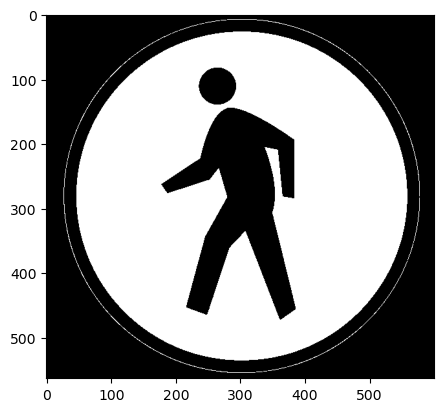

In [88]:
# Kthen `ret`, i cili është kufiri i përdorur, dhe `outs`, i cili është imazhi.
ret, outs = cv2.threshold(src = image, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# shfaqim imazhin
plt.figure(figsize=(5,5))

plt.imshow(outs, cmap='gray')

Pasi këto elemente janë kryesisht zeros, filtrimi median do t’i filtrojë përkatësisht.

### USHTRIM:

* 1) shkarkoni nje imazh, te sinjalistikave rrugore
* 2) krijoni nje imazh me zhurem nga imazhi real
* 3) aplikoni filtra per eleminimin e zhurmave ne kete imazh.
  - Shikoni çfarë ndodh kur vendosni ne nje filter per zbutjen gaussian, vlera të ndryshme për sigmaX dhe sigmaY, ose kur përdorni bërthama jo-katrore (jo katrore).
* 4) krijoni nje filter te personalizuar per eleminimin e ketyre zhurmave 
  - (per shembull nje filtri sobel i rrotulluar me 45 grad ne nje dritare 4x4)
* 5) apliko filtrin e sobelit dhe ngjyros pikselat e bardhe ne te kuq

(563, 600)


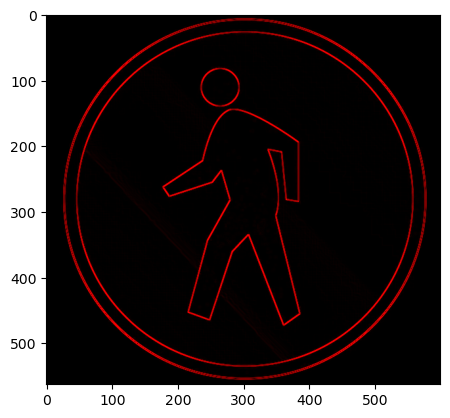

In [100]:
# Krijimi i imazhit me vlera zero
print(grad.shape)
im_ng = np.zeros((563, 600, 3), dtype=np.uint8)
im_ng[:,:,2]= grad
plt.imshow(cv2.cvtColor(im_ng, cv2.COLOR_BGR2RGB))

# Referenca

[1]  Imazhet jan marre nga: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h3 align="center"> &#169; UMT. All rights reserved. <h3/>